In [1]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Import functions from peak_functions

repository_path = os.path.abspath('..')
sys.path.append(repository_path)

import blr_functions as blr

In [4]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 12

In [5]:
filename = '/Users/romoluque_c/LEGEND/BACON/datatest/run-06_02_2023-file.root'
infile   = uproot.open(filename)
RawTree  = infile['RawTree']

Mode: 15443.0


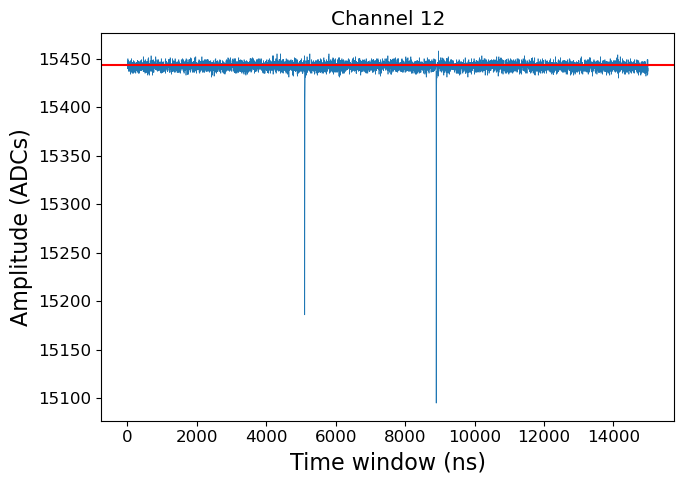

In [6]:
choose_evt = 4

plt.figure(figsize=(7, 5))
channel  = 12
wf = np.array(RawTree[f'chan{channel}/rdigi'].array())[choose_evt]
plt.plot(2*np.arange(len(wf)), wf, linewidth=0.5)
plt.axhline(st.mode(wf.astype(float), keepdims=False).mode, color='r', label='Mode')
print(f'Mode: {st.mode(wf.astype(float), keepdims=False).mode}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.show()

### PMT wf deconvolution

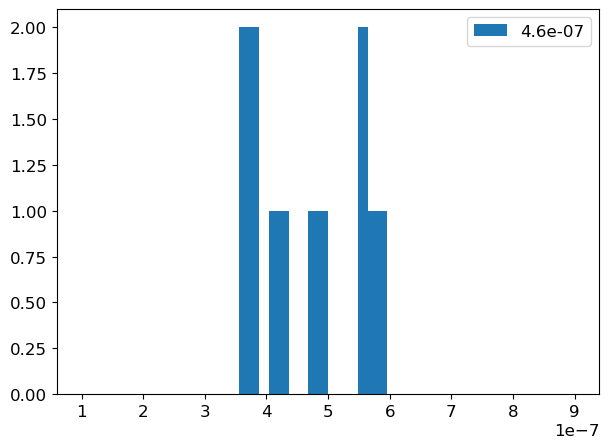

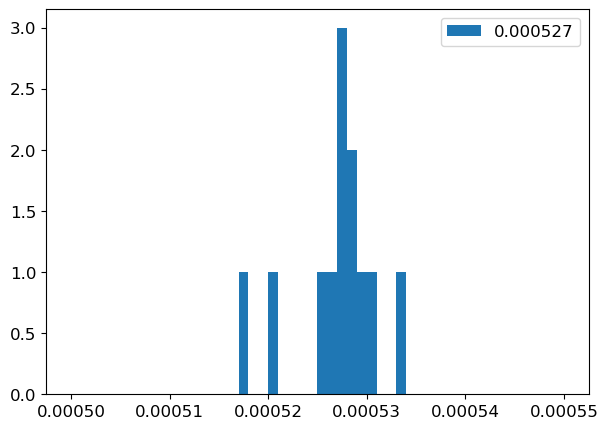

In [7]:
coeff_c_NEXT   = np.array([0.00000042504, 0.00000055255, 0.00000035999, 0.00000035639, 0.00000047635, 0.00000059184, 0.00000055974, 0.00000057049, 0.00000038041, 0.00000041167, 0.00000037353, 0.00000048496])
coeff_blr_NEXT = np.array([0.00053015, 0.00052996, 0.00053319, 0.00052624, 0.00052731, 0.00052813, 0.00051798, 0.00052867, 0.00052046, 0.0005271, 0.00052704, 0.00052508])

plt.figure(figsize=(7, 5))
plt.hist(coeff_c_NEXT, bins=50, range=(0.0000001, 0.0000009), label=f'{np.round(np.mean(coeff_c_NEXT), decimals=8)}')
plt.legend();

plt.figure(figsize=(7, 5))
plt.hist(coeff_blr_NEXT, bins=50, range=(0.0005, 0.00055), label=f'{np.round(np.mean(coeff_blr_NEXT), decimals=6)}')
plt.legend();

In [8]:
cwf = blr.pmt_deconvolver(wf)

Mode: -16.047281876578108, Mean = -0.0005196109844079425


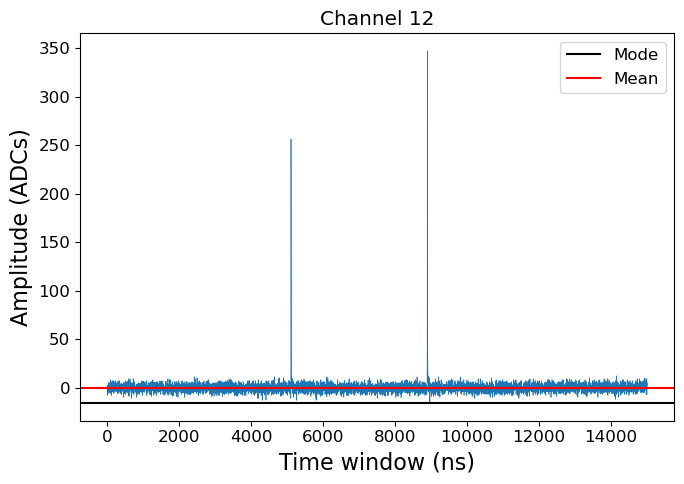

In [9]:
choose_evt = 4

plt.figure(figsize=(7, 5))
plt.plot(2*np.arange(len(cwf)), cwf, linewidth=0.5)
plt.axhline(st.mode(cwf.astype(float), keepdims=False).mode, color='k', label='Mode')
plt.axhline(np.mean(cwf.astype(float)),                      color='r', label='Mean')
print(f'Mode: {st.mode(cwf.astype(float), keepdims=False).mode}, Mean = {np.mean(cwf.astype(float))}')
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Channel {channel}")
plt.tight_layout()
plt.legend()
plt.show()

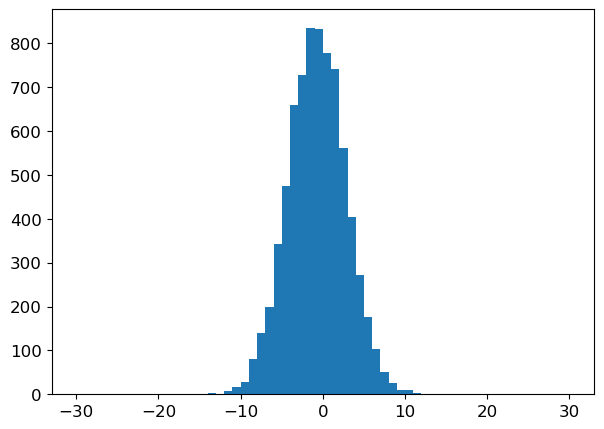

In [10]:
plt.figure(figsize=(7, 5))
plt.hist(cwf, bins=60, range=(-30, 30));

In [11]:
cwf

array([-2.03319852,  1.96782912, -4.03691036, ..., -7.03928044,
        4.97020302,  1.9678275 ])

### Compute for all wfs

In [12]:
all_wfs  = np.array(RawTree[f'chan{channel}/rdigi'].array())
all_cwfs = list(map(blr.pmt_deconvolver, all_wfs))

In [13]:
all_cwfs_flatten = np.concatenate(all_cwfs)

In [14]:
np.mean(all_cwfs_flatten)

-0.00849900777281942

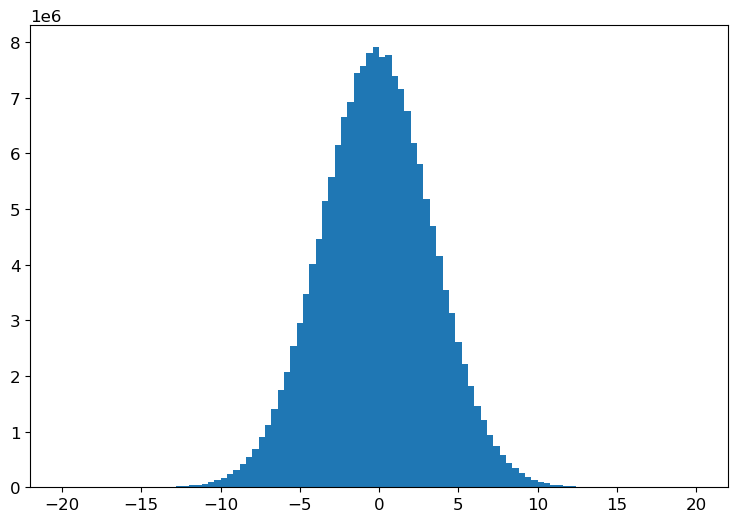

In [15]:
plt.hist(all_cwfs_flatten, bins=100, range=(-20, 20), log=False);

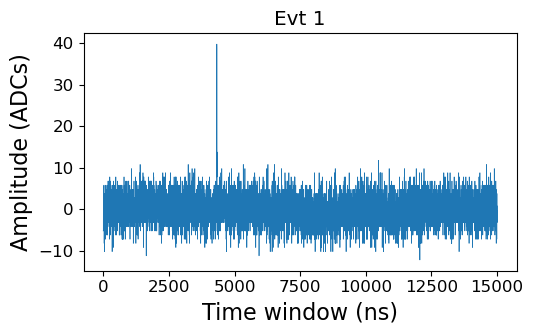

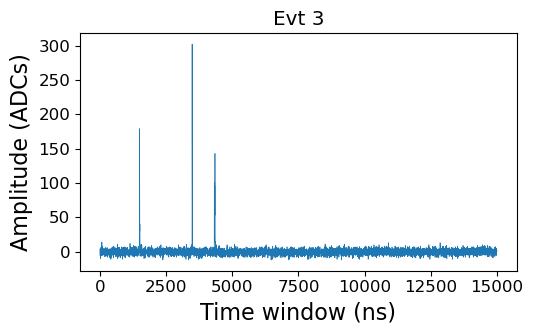

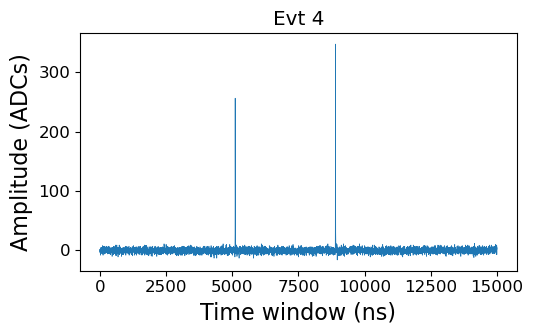

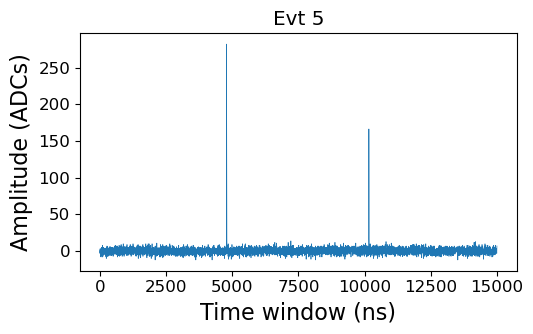

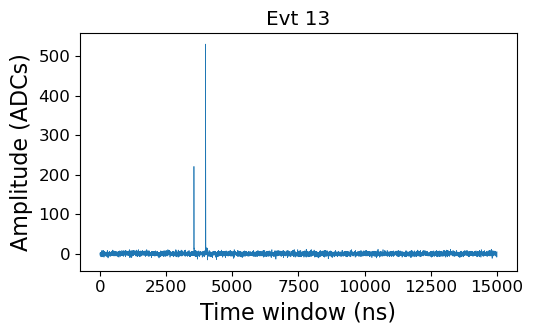

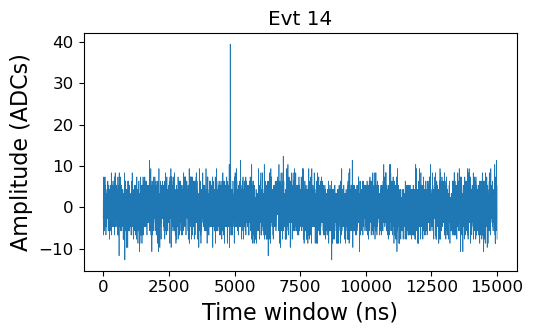

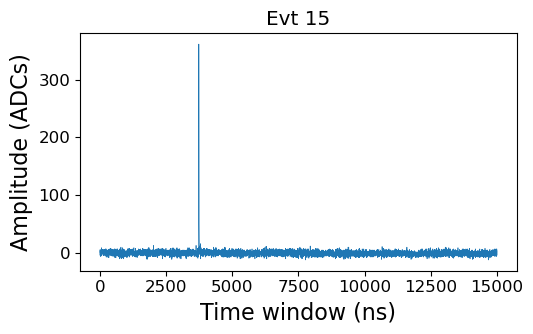

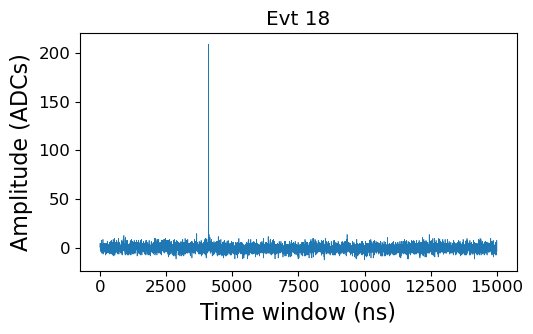

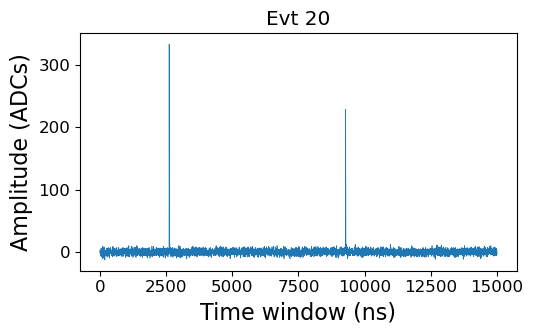

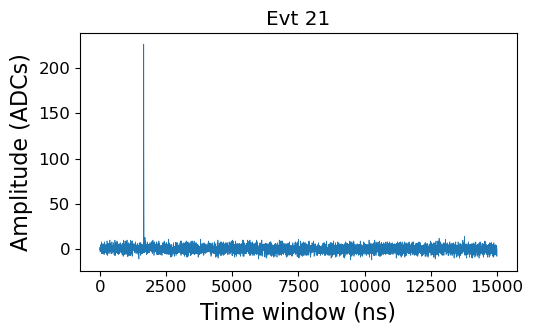

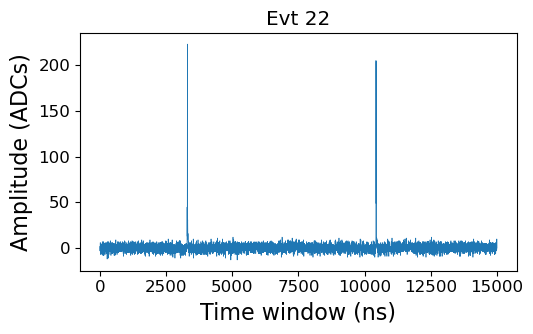

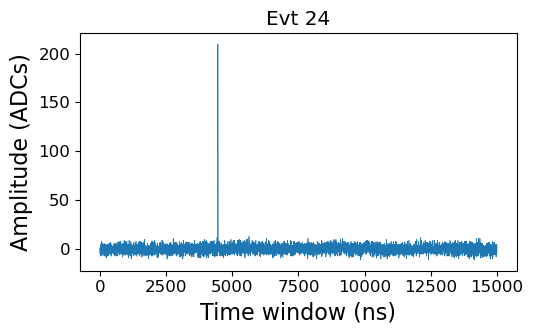

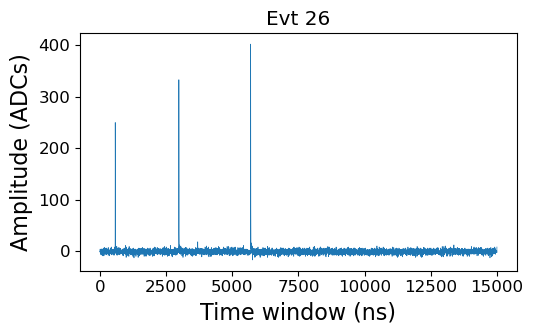

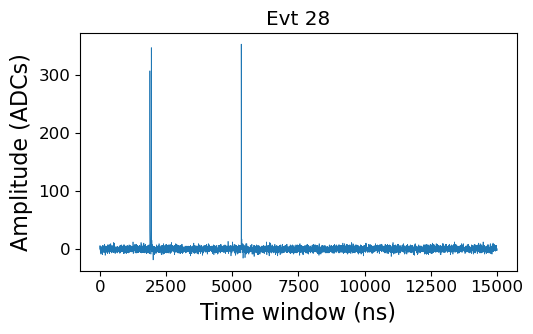

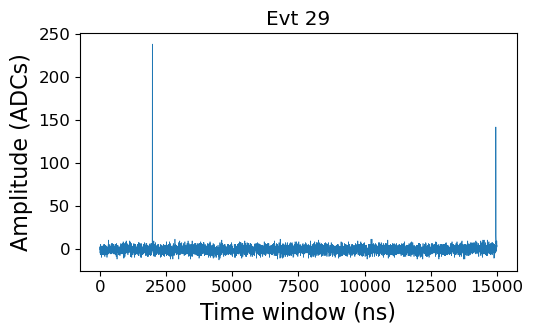

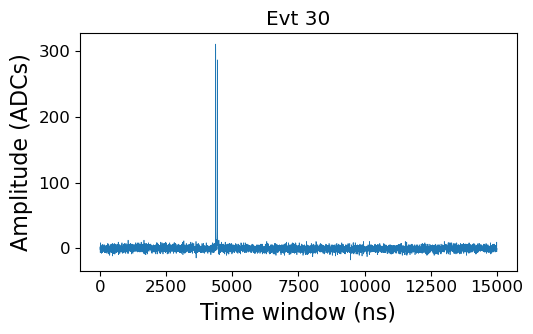

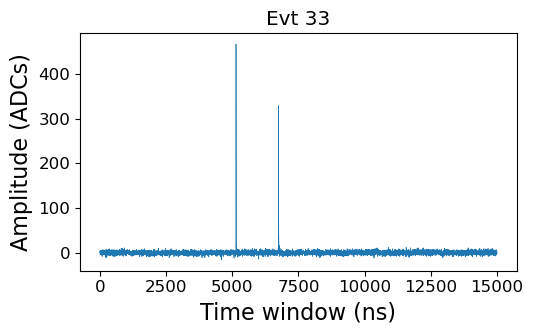

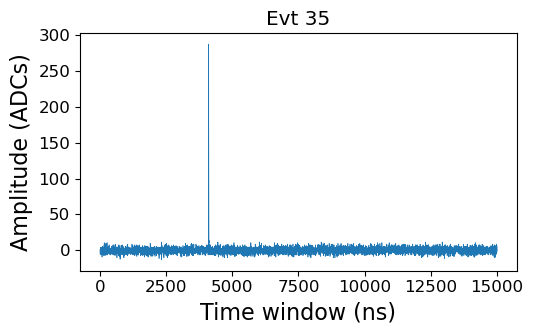

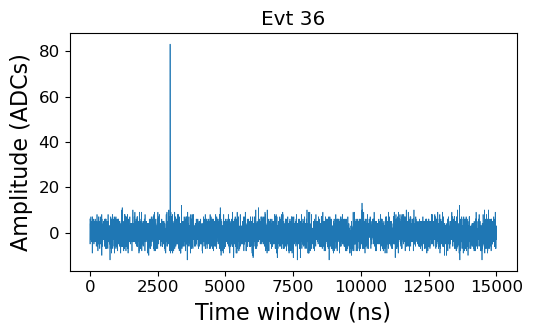

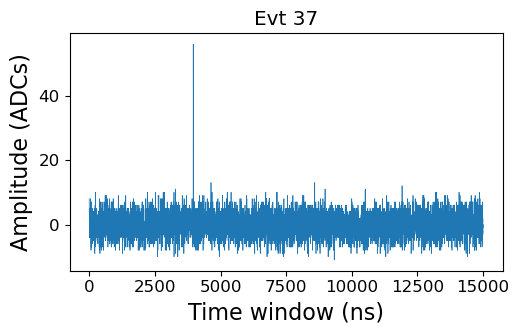

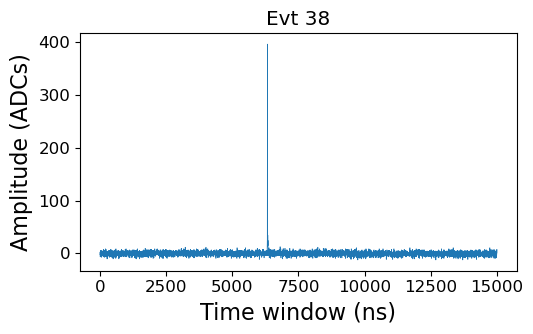

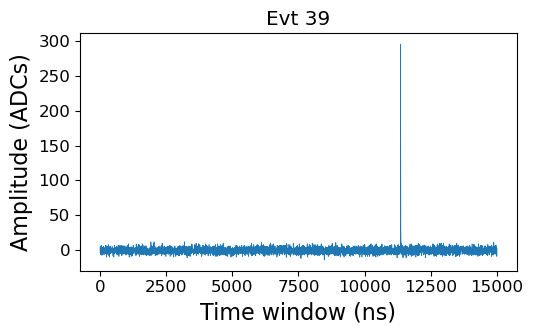

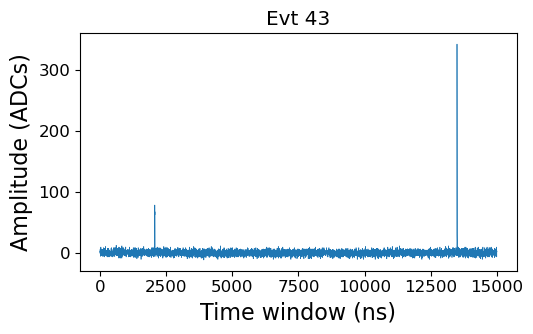

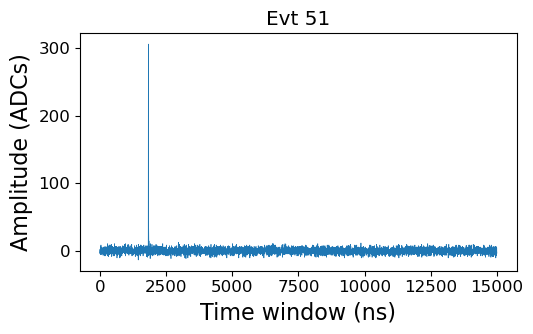

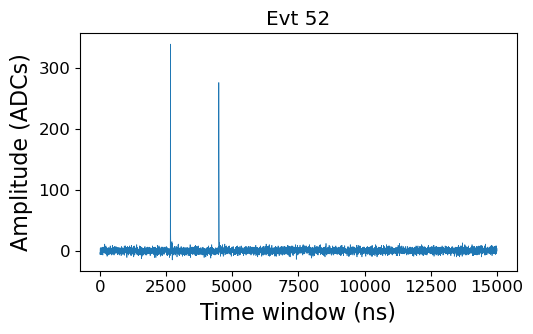

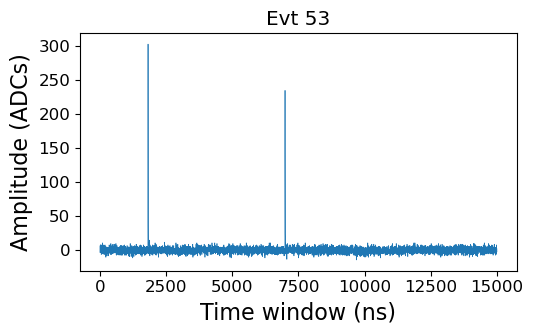

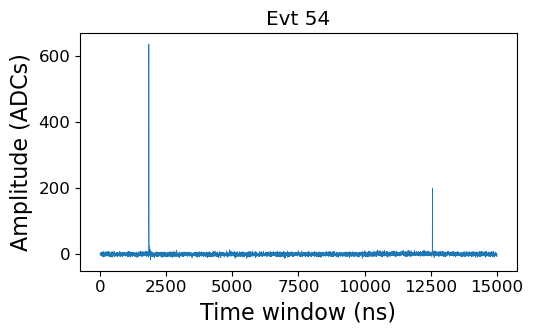

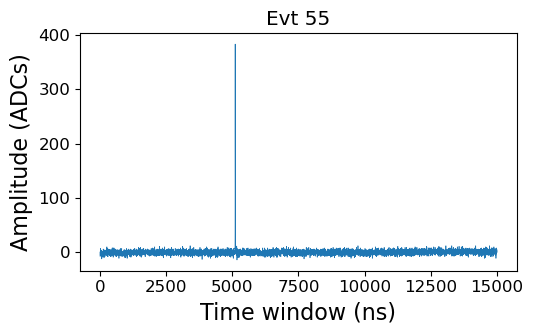

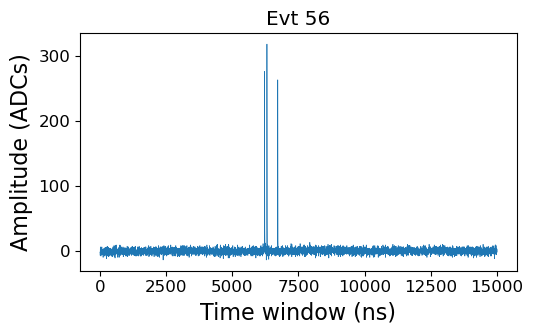

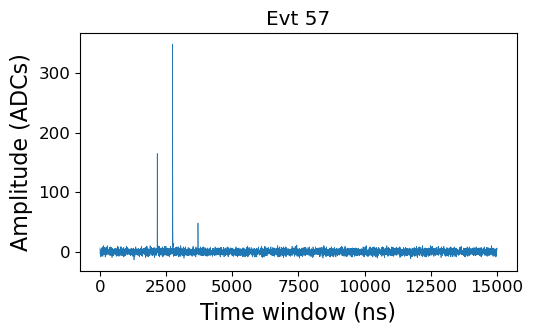

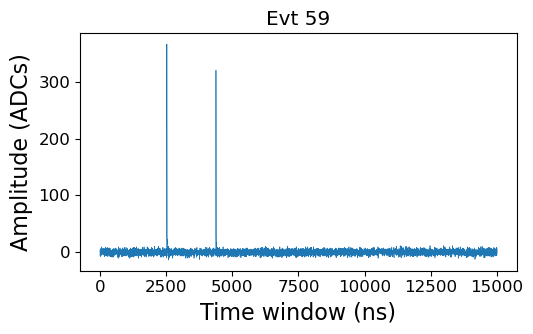

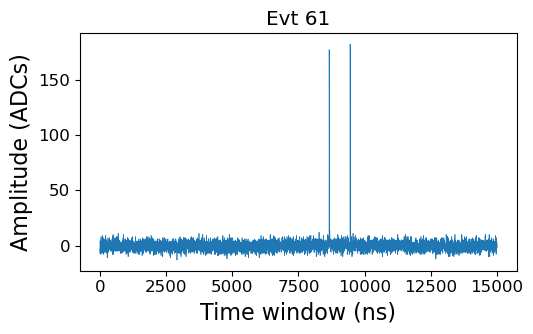

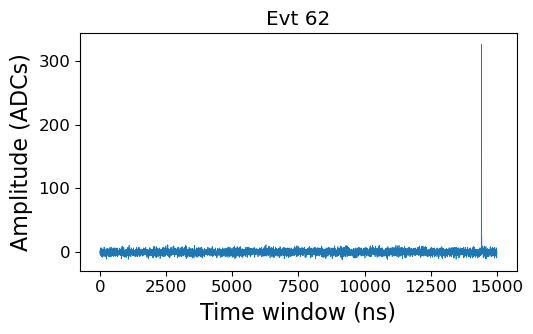

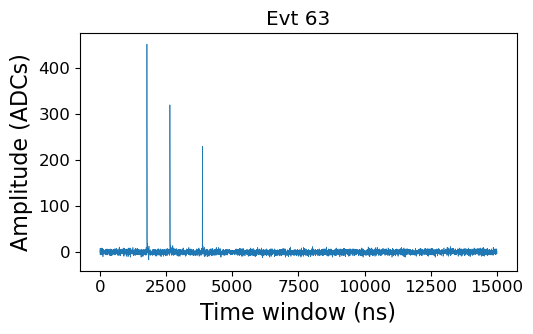

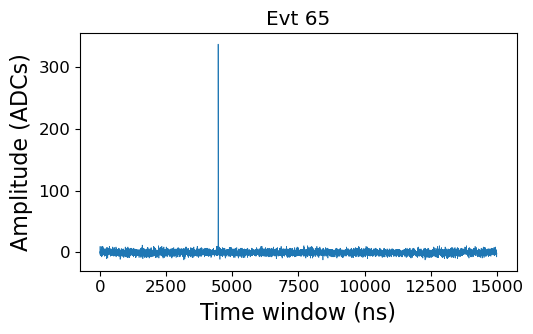

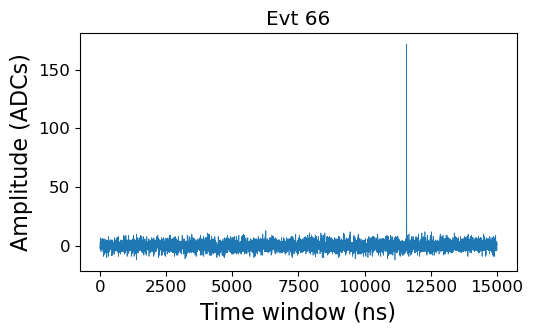

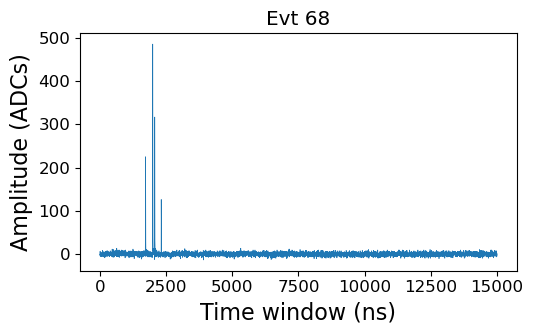

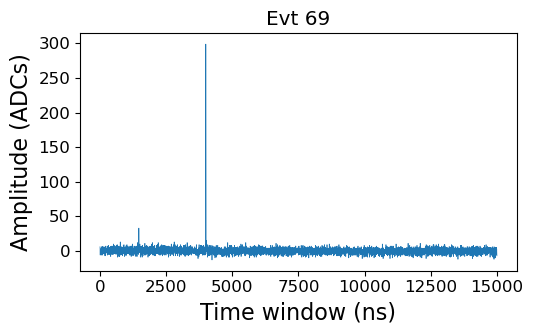

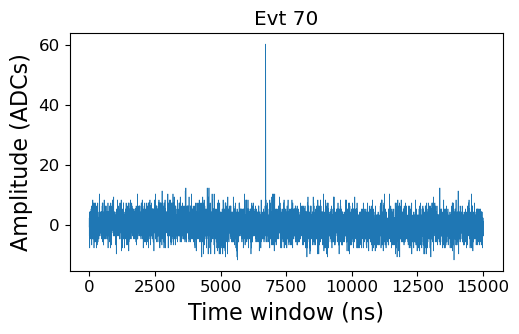

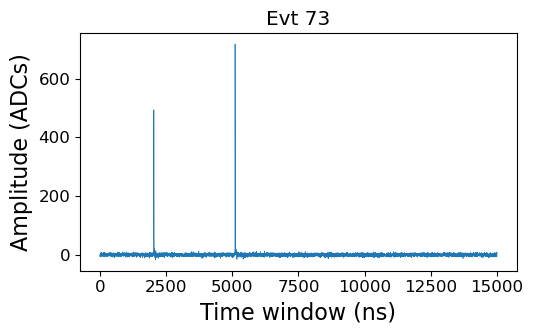

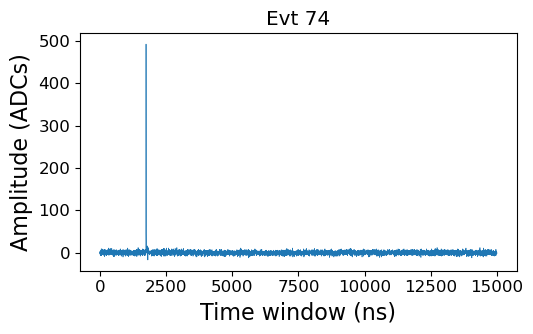

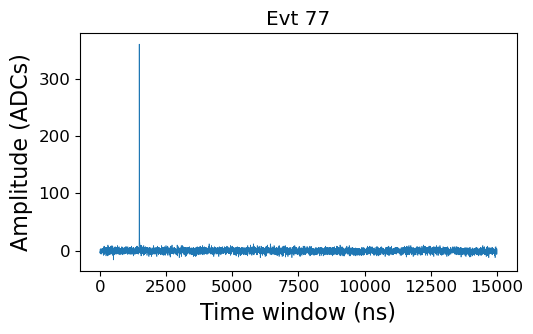

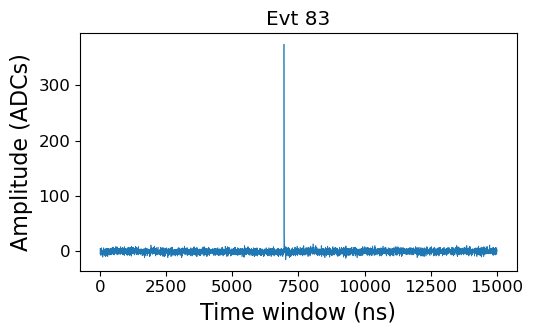

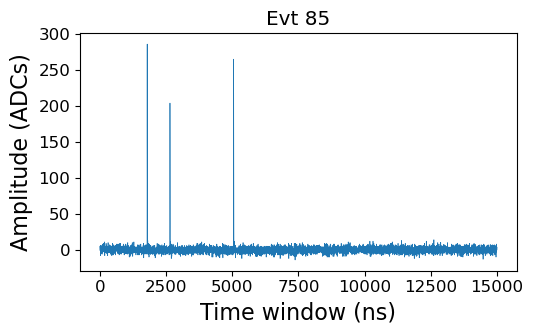

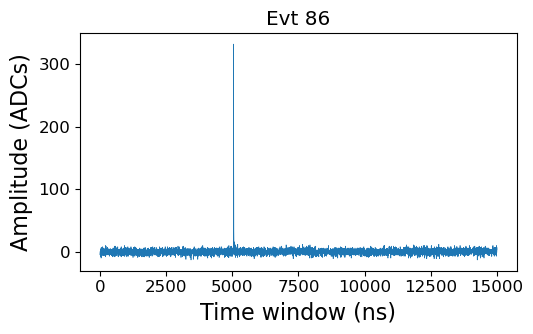

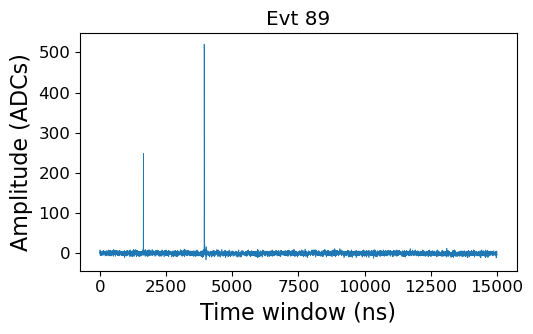

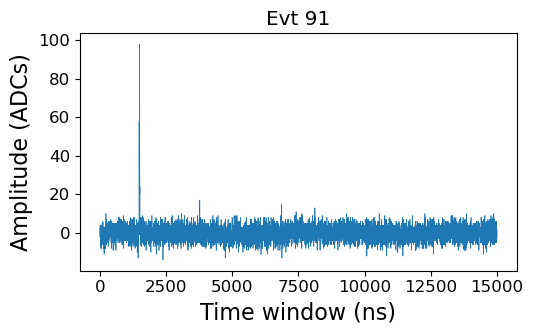

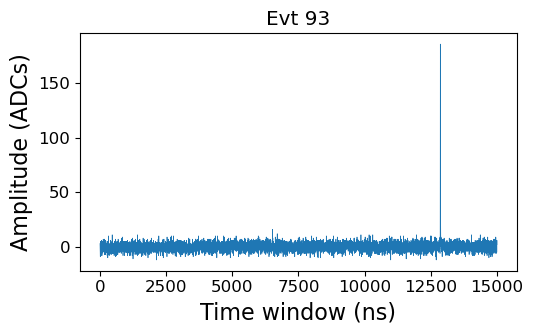

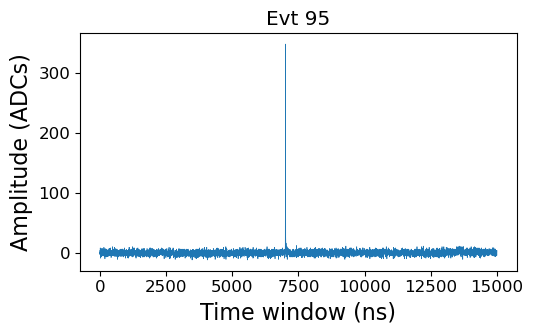

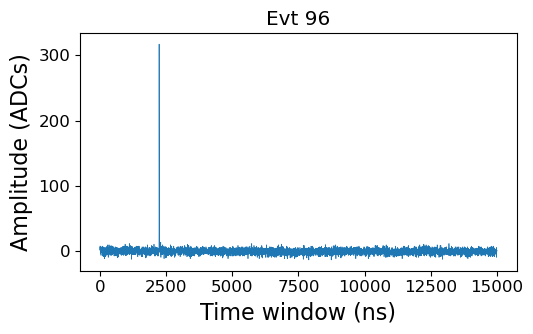

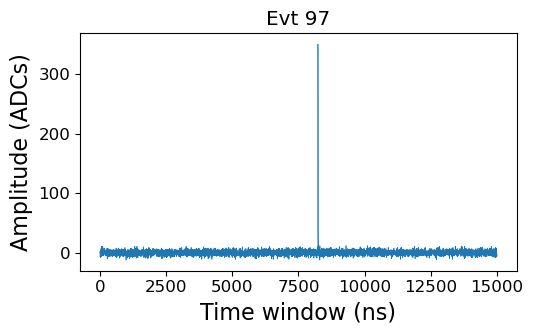

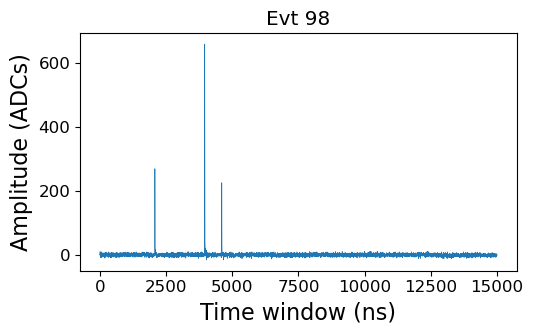

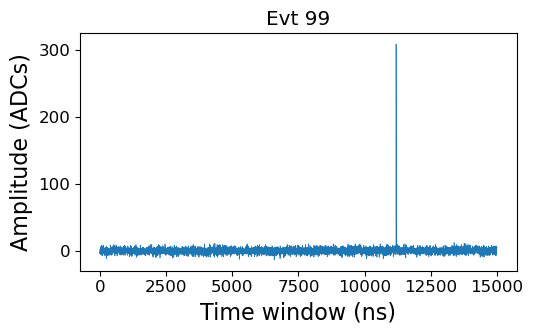

In [16]:
for evt, sel_wf in enumerate(all_cwfs[:100]):
    sel_mask = sel_wf > 20
    if not np.any(sel_mask):
        continue

    plt.figure(figsize=(5.5, 3.5))
    plt.plot(2*np.arange(len(sel_wf)), sel_wf, linewidth=0.5)
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADCs)', fontsize=16)
    plt.title(f"Evt {evt}")
    plt.tight_layout()
    plt.show()

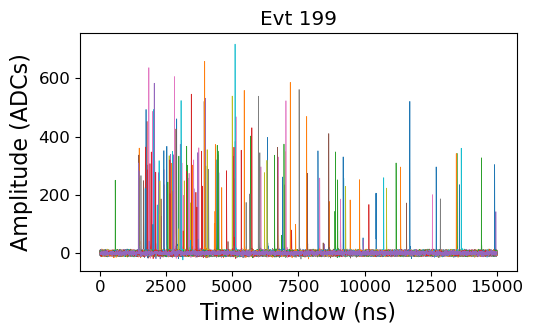

In [17]:
plt.figure(figsize=(5.5, 3.5))
for evt, sel_wf in enumerate(all_cwfs[:200]):
    sel_mask = sel_wf > 20
    if not np.any(sel_mask):
        continue

    plt.plot(2*np.arange(len(sel_wf)), sel_wf, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Evt {evt}")
plt.tight_layout()
plt.show()

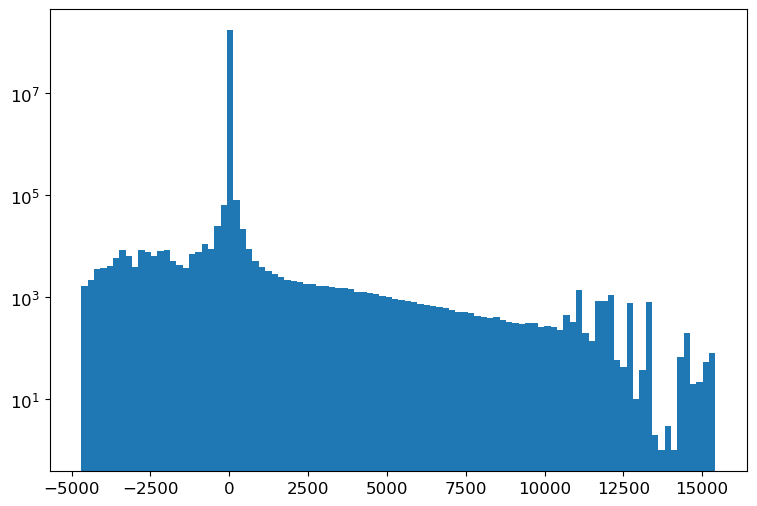

In [18]:
plt.hist(all_cwfs_flatten, bins=100, log=True);

In [19]:
all_cwfs_flatten[(all_cwfs_flatten<-15)|(all_cwfs_flatten>15)]

array([39.81106477, 38.79031564, 18.78500611, ..., 62.67059197,
       19.65920655, 16.65839004])

### Saturating events:

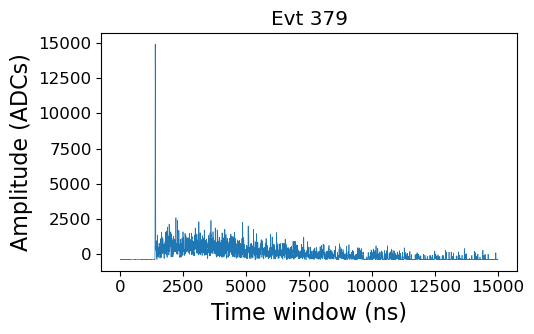

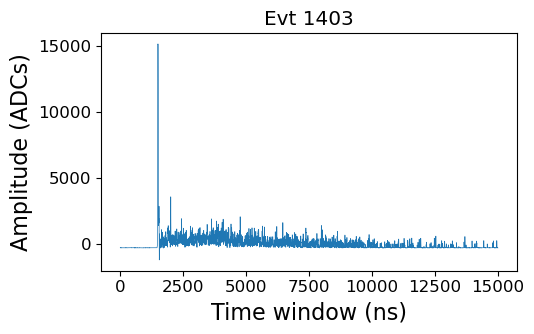

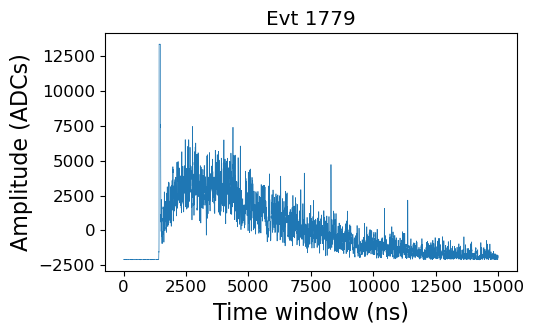

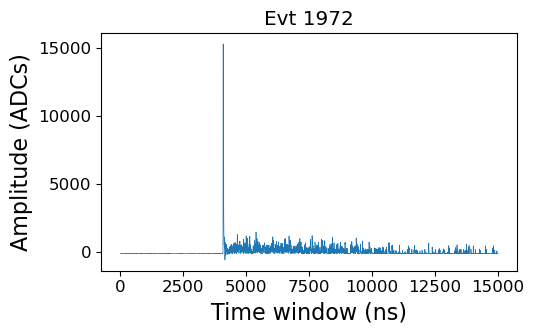

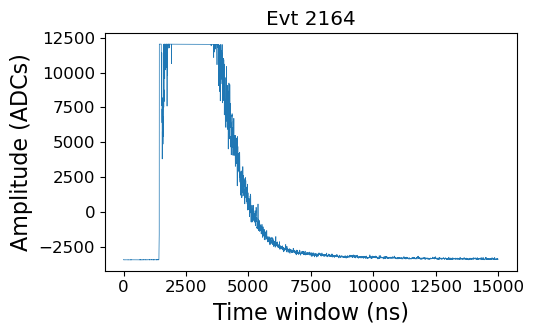

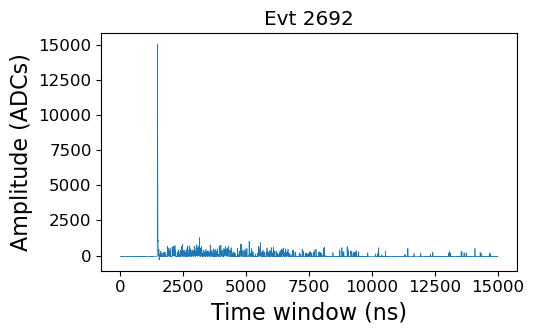

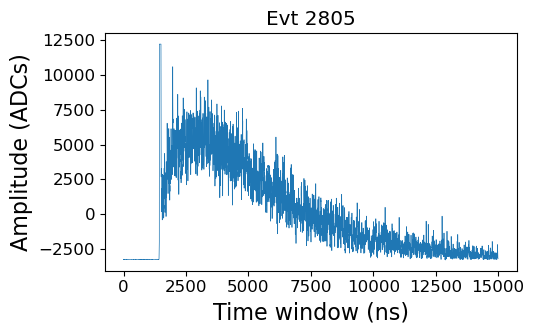

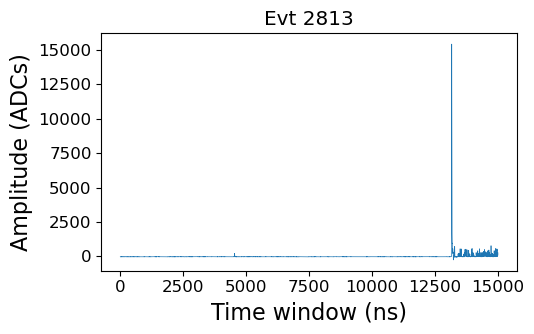

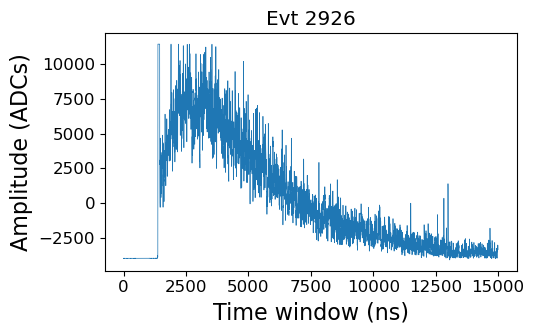

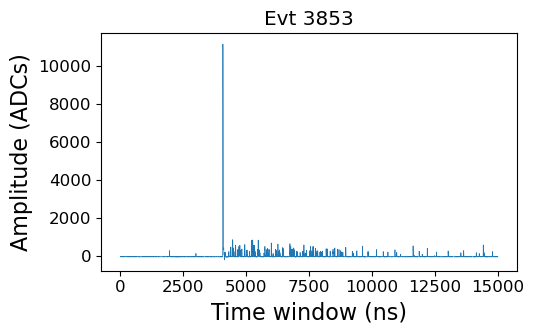

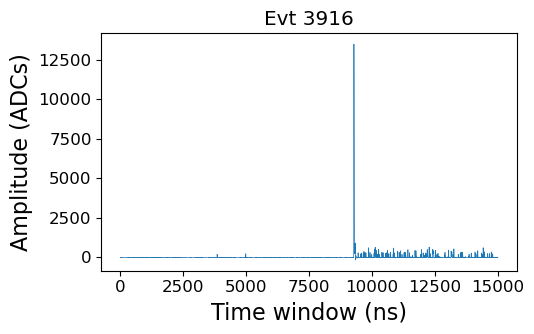

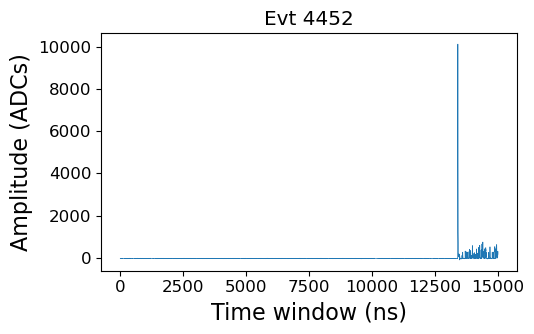

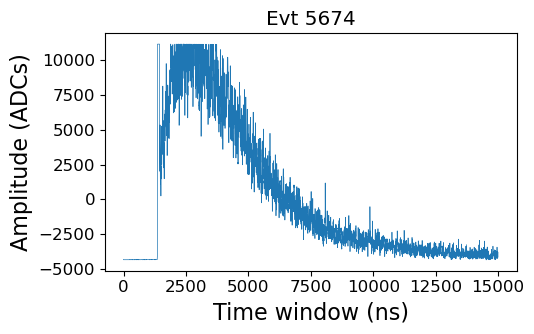

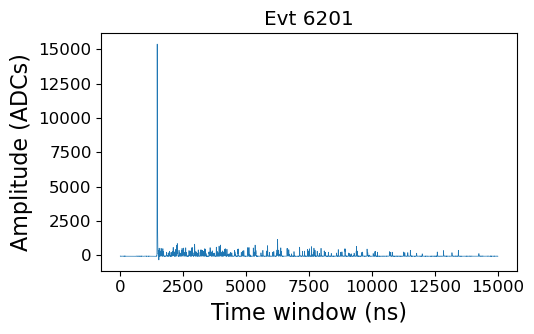

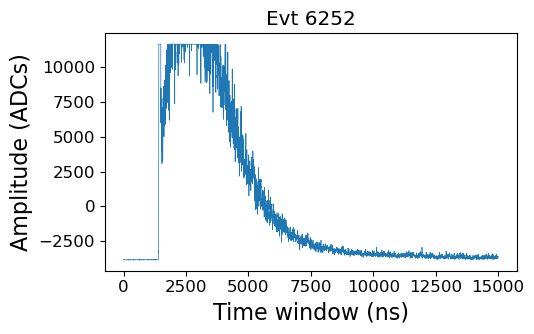

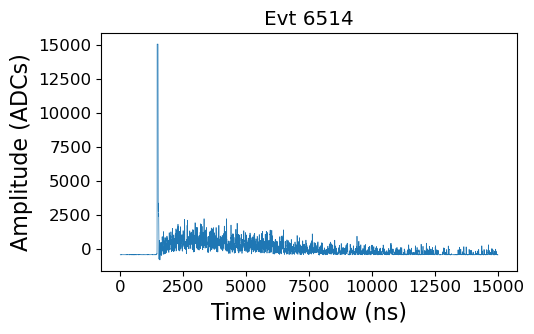

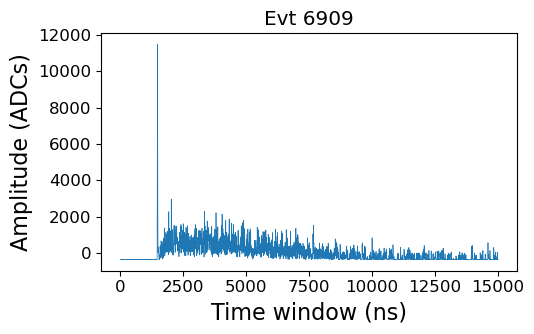

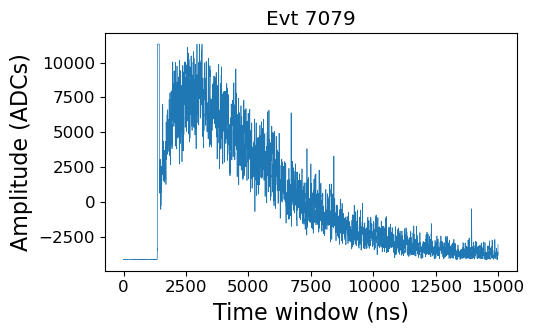

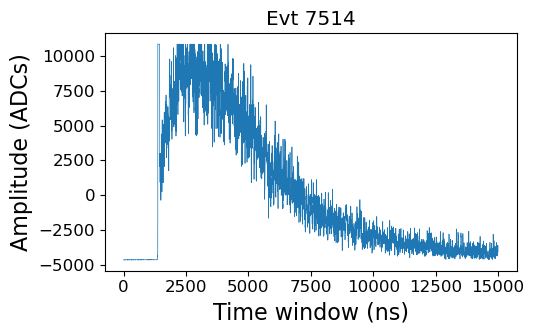

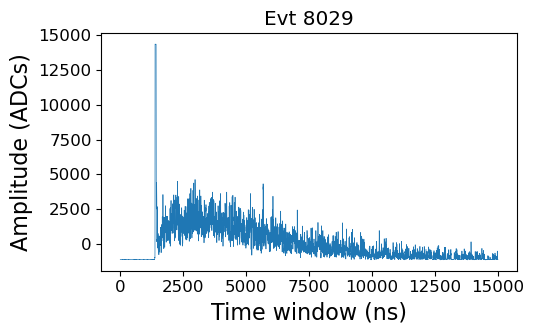

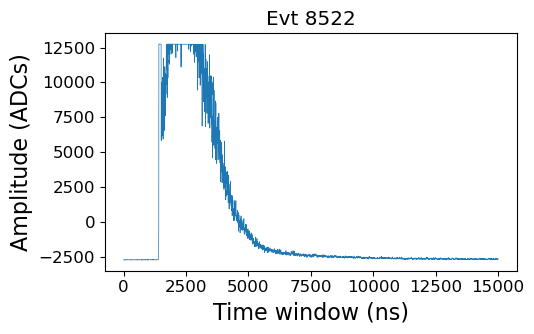

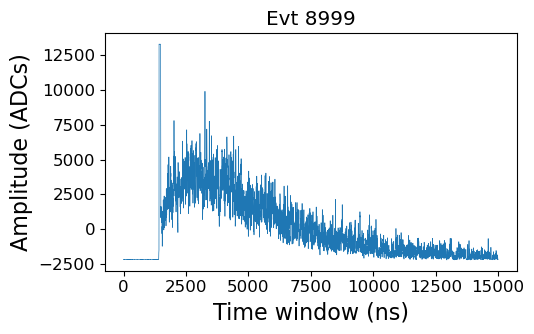

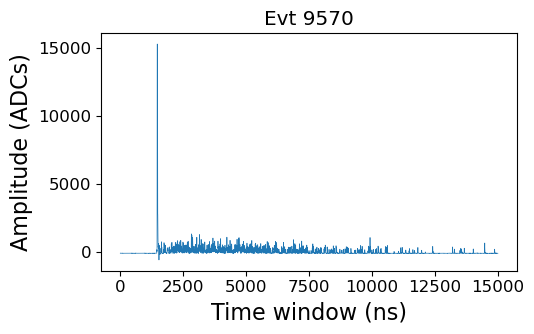

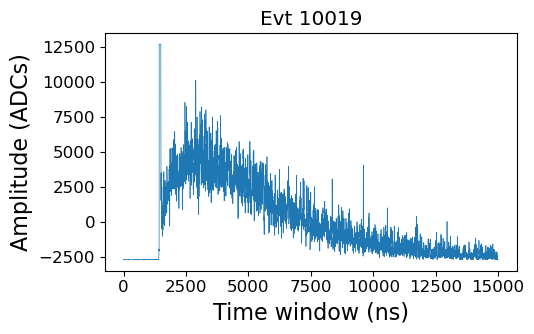

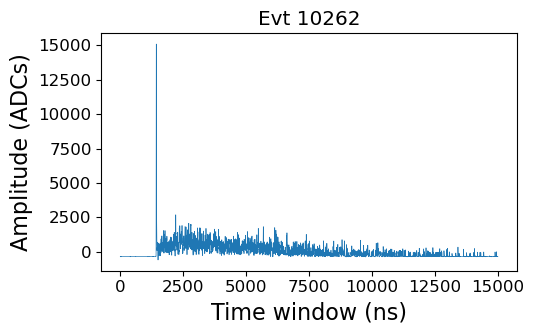

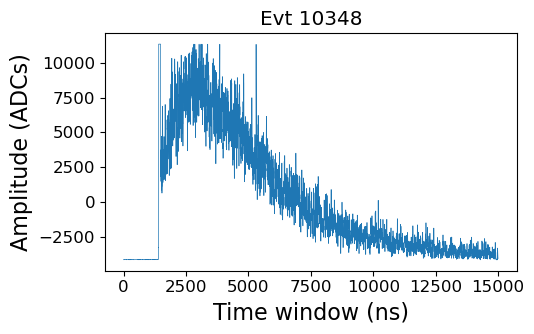

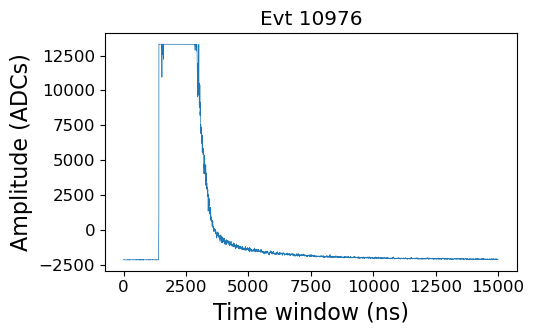

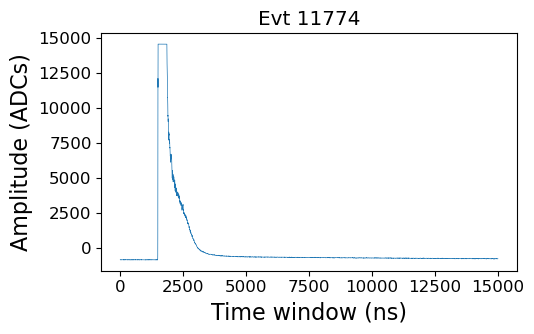

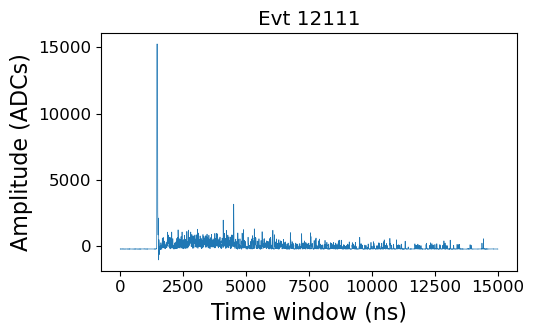

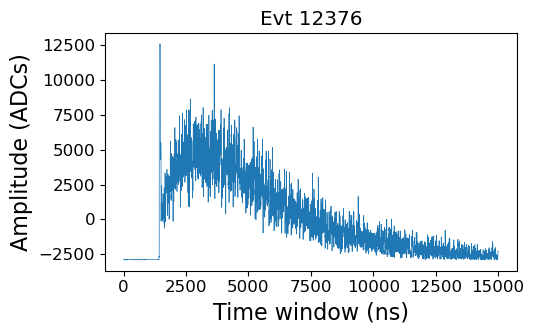

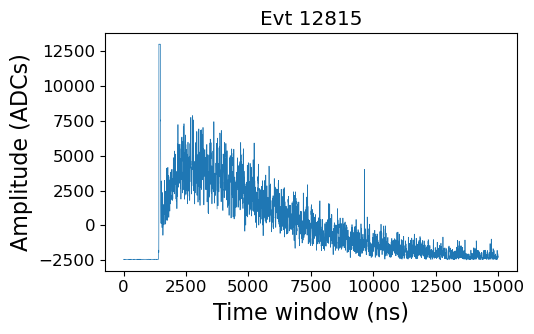

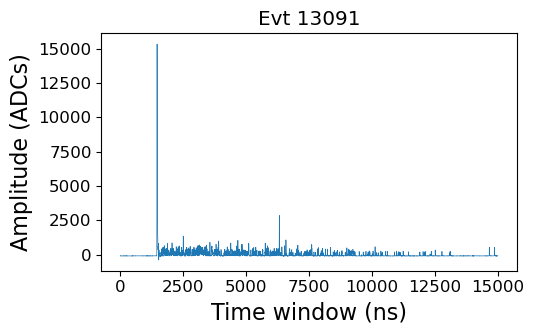

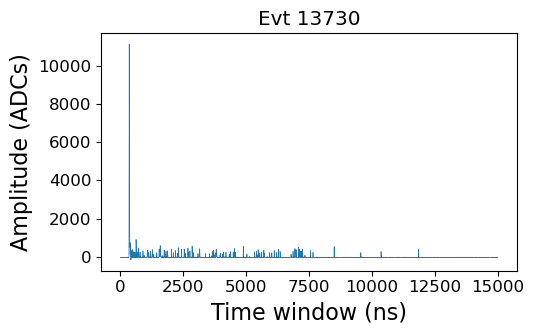

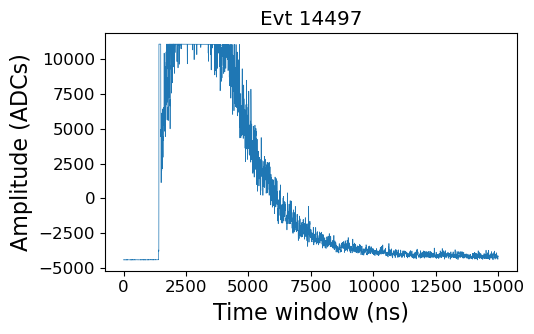

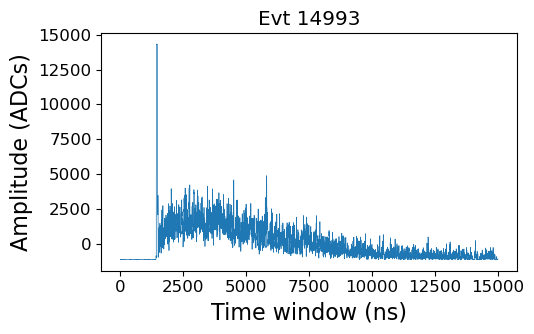

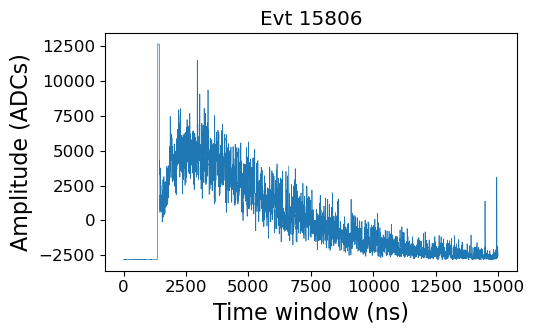

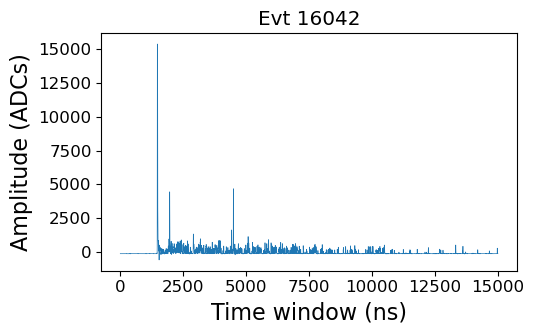

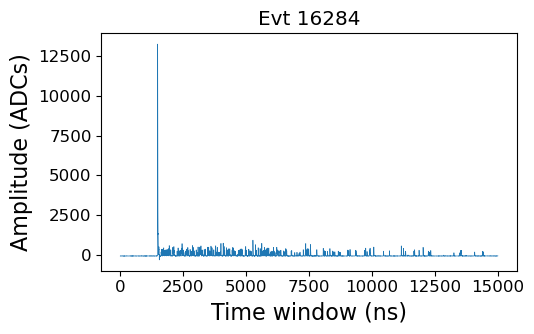

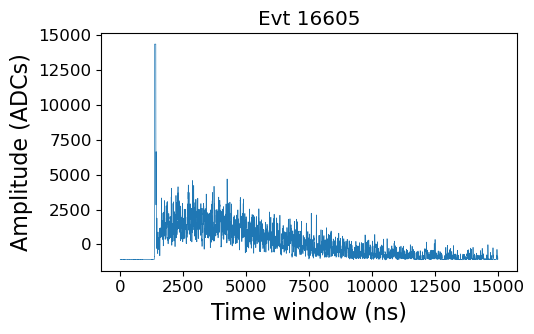

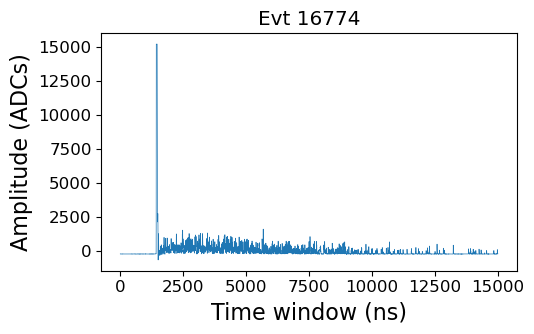

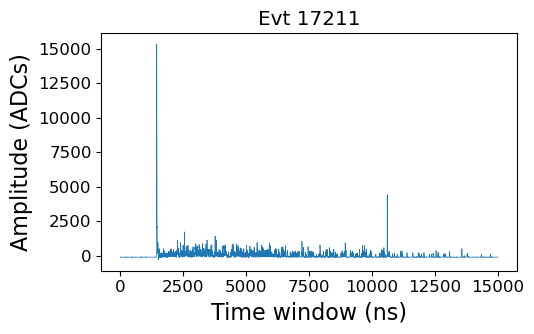

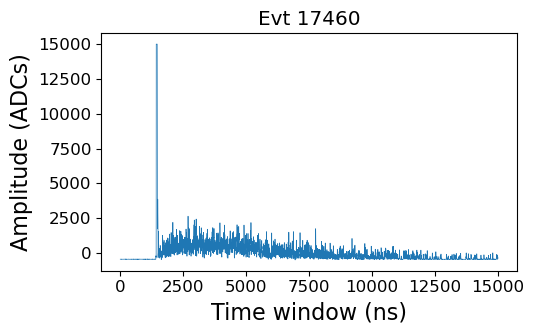

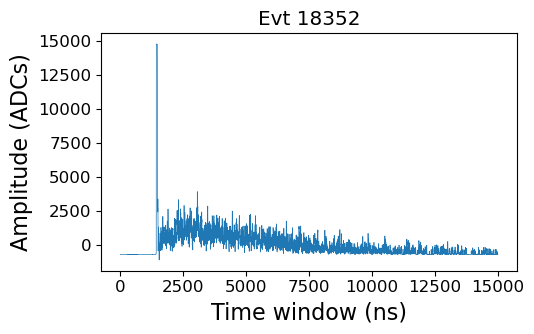

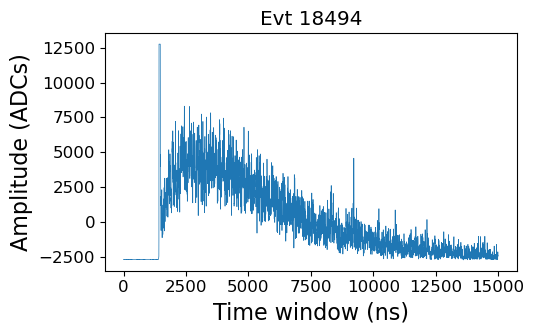

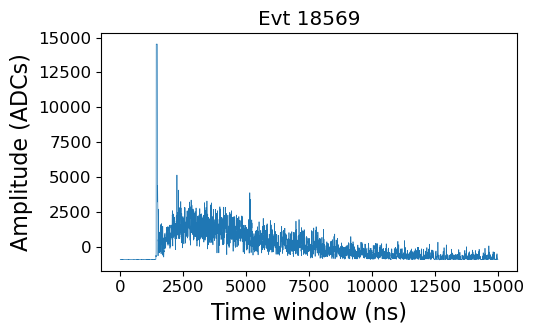

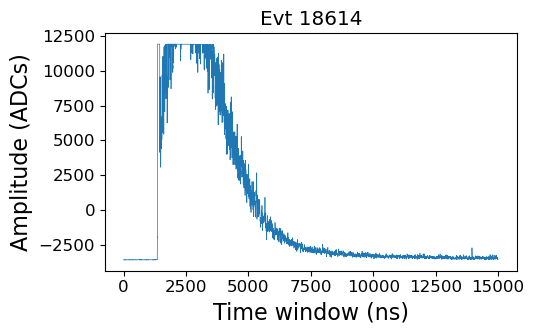

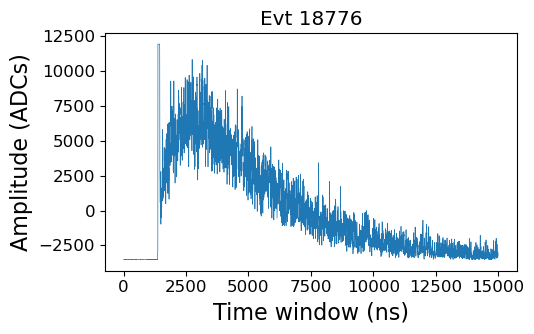

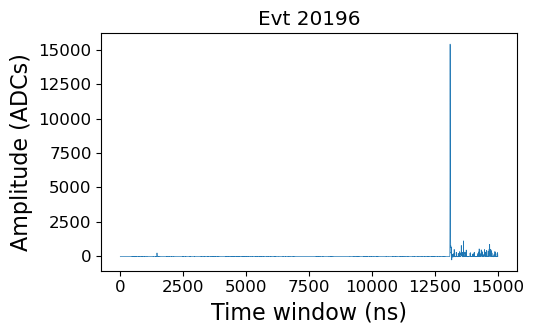

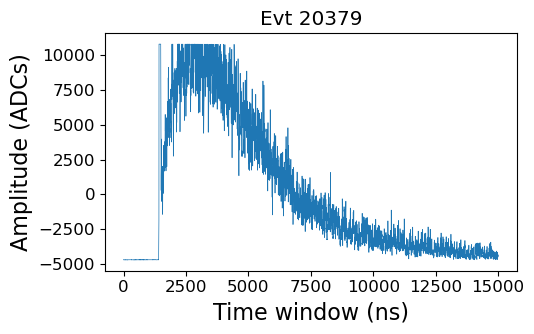

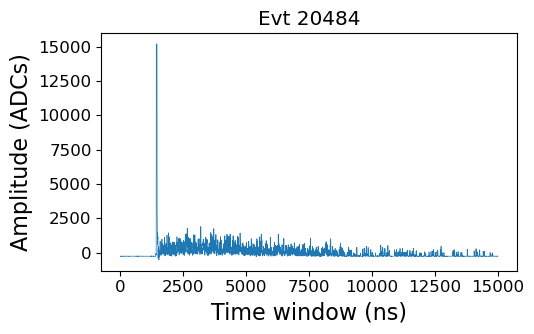

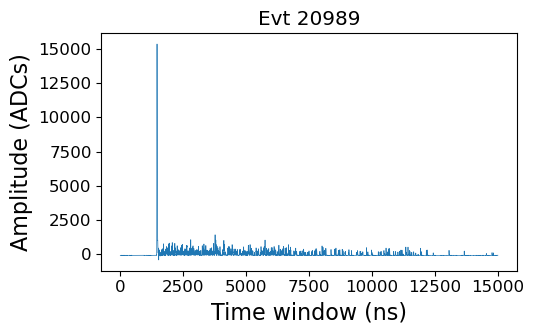

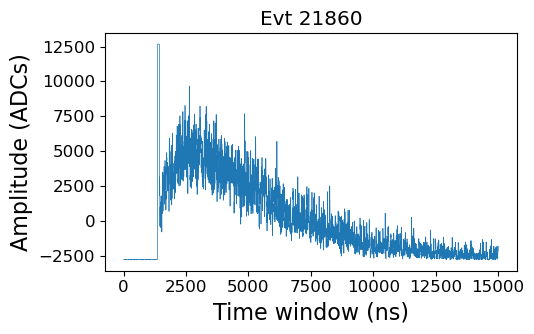

In [20]:
for evt, sel_wf in enumerate(all_cwfs):
    sel_mask = sel_wf > 10000
    if not np.any(sel_mask):
        continue

    plt.figure(figsize=(5.5, 3.5))
    plt.plot(2*np.arange(len(sel_wf)), sel_wf, linewidth=0.5)
    plt.xlabel('Time window (ns)', fontsize=16)
    plt.ylabel('Amplitude (ADCs)', fontsize=16)
    plt.title(f"Evt {evt}")
    plt.tight_layout()
    plt.show()

#### Look at the SiPMs signal of a saturating event:

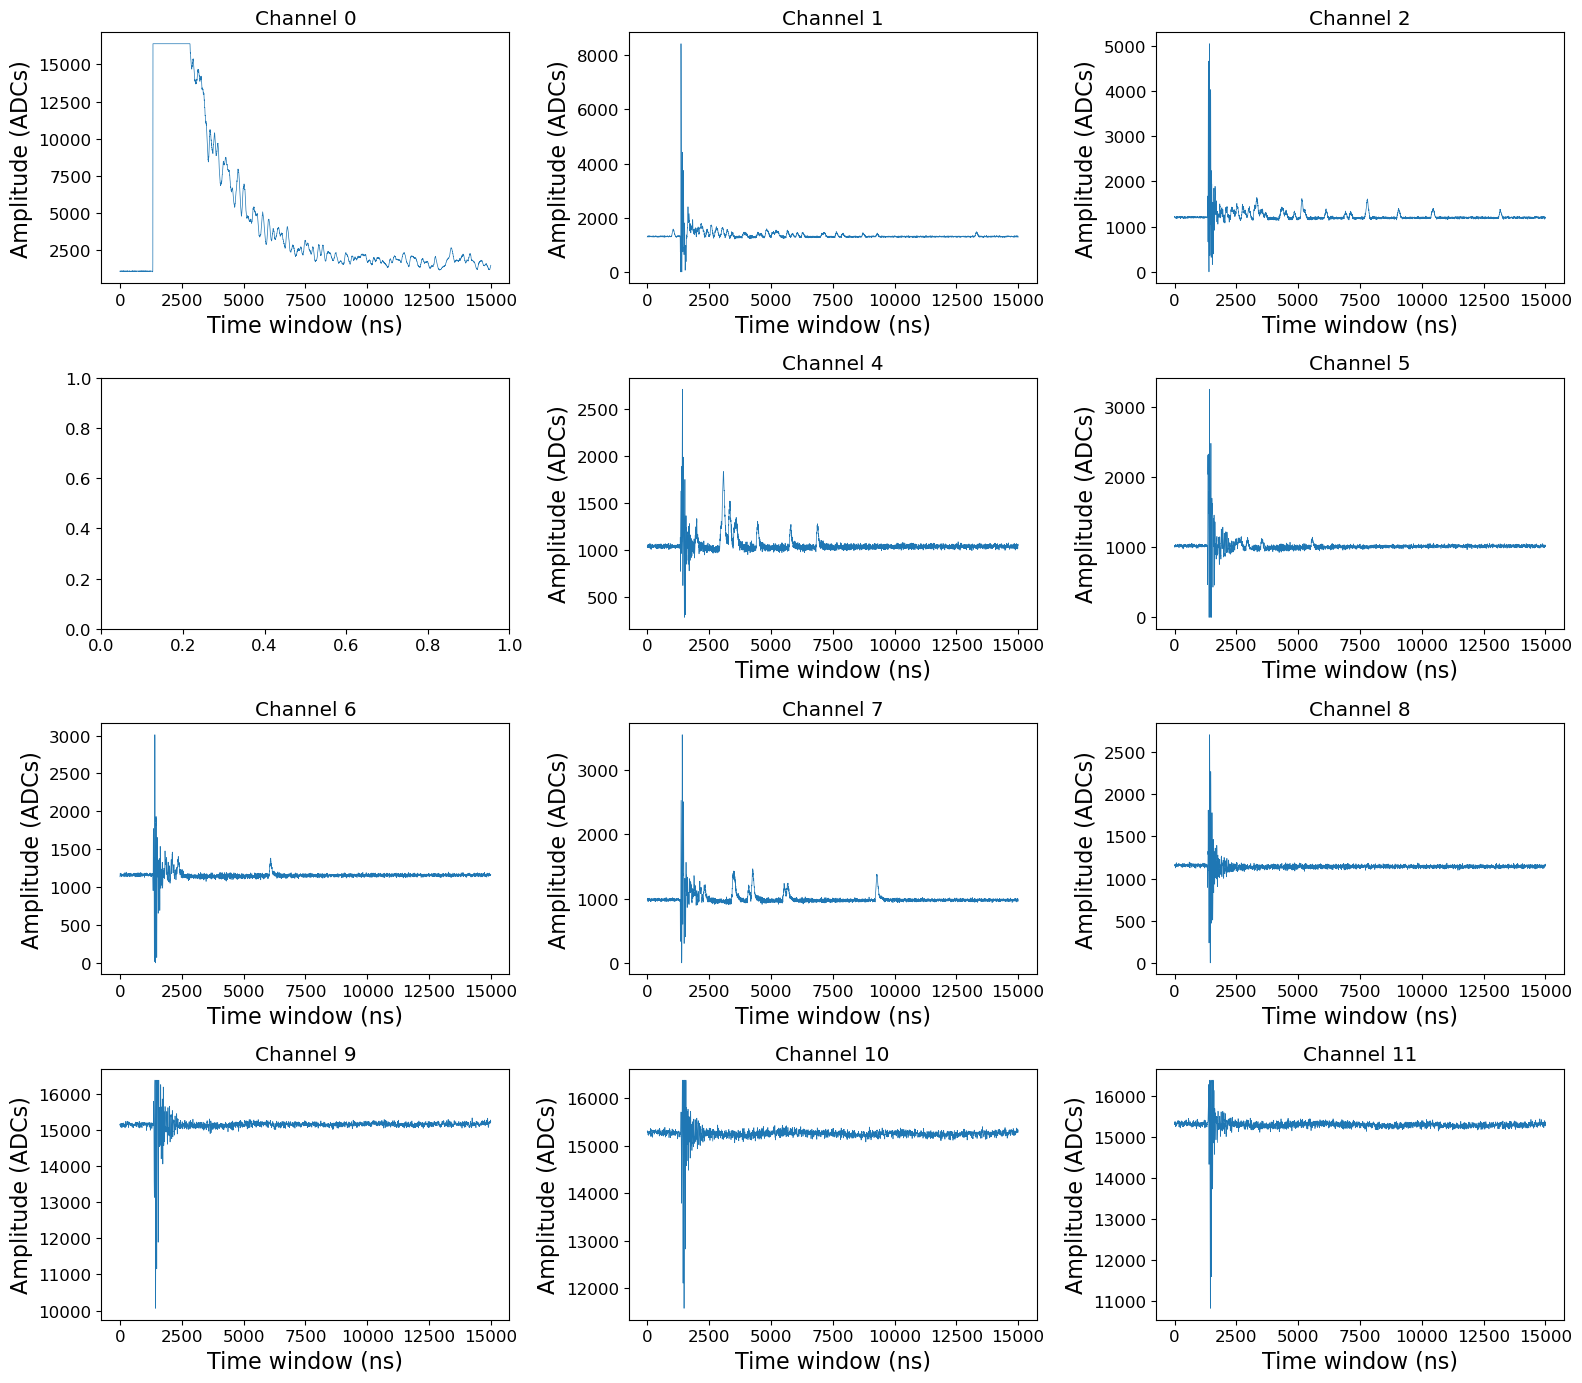

In [21]:
choose_evt = 379
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    if k==3: continue
    i = int(k/3)
    j = k%3
    wf = np.array(RawTree[f'chan{k}/rdigi'].array())[choose_evt]
    axs[i][j].plot(2*np.arange(len(wf)), wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
plt.tight_layout()
plt.show()

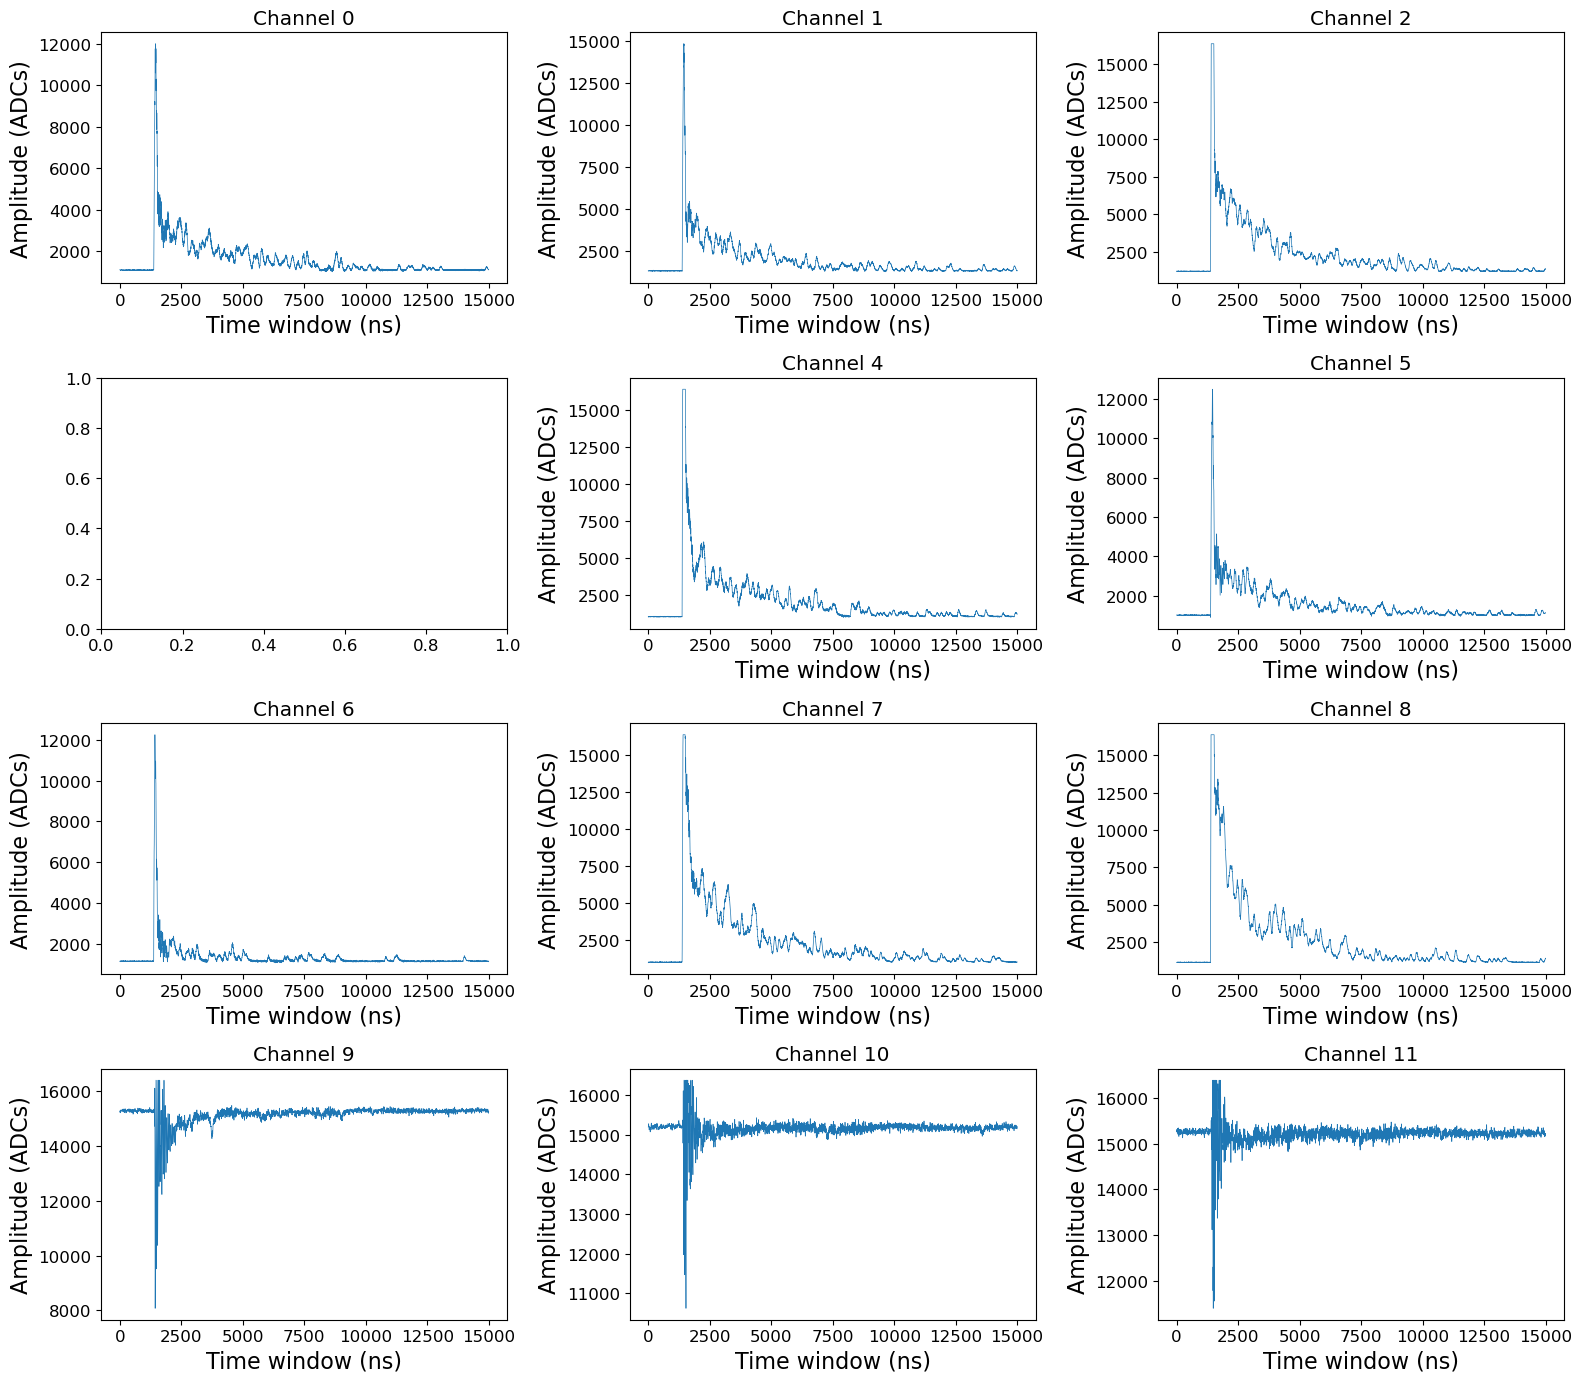

In [22]:
choose_evt = 1779
fig, axs = plt.subplots(4, 3, figsize=(16, 14))
for k in range(12):
    if k==3: continue
    i = int(k/3)
    j = k%3
    wf = np.array(RawTree[f'chan{k}/rdigi'].array())[choose_evt]
    axs[i][j].plot(2*np.arange(len(wf)), wf, linewidth=0.5)
    axs[i][j].set_xlabel('Time window (ns)', fontsize=16)
    axs[i][j].set_ylabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_title(f"Channel {k}")
plt.tight_layout()
plt.show()

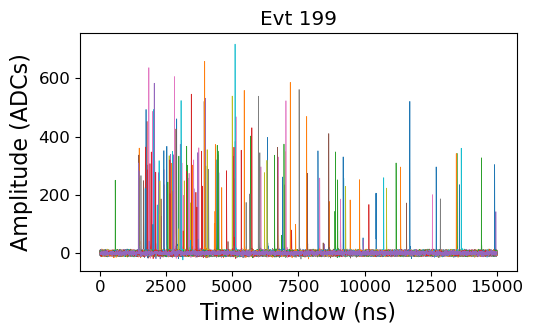

In [23]:
plt.figure(figsize=(5.5, 3.5))
for evt, sel_wf in enumerate(all_cwfs[:200]):
    sel_mask = sel_wf > 20
    if not np.any(sel_mask):
        continue

    plt.plot(2*np.arange(len(sel_wf)), sel_wf, linewidth=0.5)
plt.xlabel('Time window (ns)', fontsize=16)
plt.ylabel('Amplitude (ADCs)', fontsize=16)
plt.title(f"Evt {evt}")
plt.tight_layout()
plt.show()